### Random Forest

Random forest is a machine learning algorithm that combines the output of multiple decision trees to reach a single result. This algorithm is an extension of the bagging method as it utilizes both bagging and feature randomness to create an uncorrelated forest of decision trees. 

As our data has 7 columns and 186125 rows, Random Forest is suitable as it can handle large datasets with many instances and dimensions. Random Forest also provides insight into feature importance. This is useful for us to analyze the importance of each feature in the ensemble, to help us understand which features are most influential in making predictions (hypertension). 

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb #for graphics
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score,f1_score, roc_curve, roc_auc_score, precision_recall_curve, average_precision_score, classification_report, cohen_kappa_score

In [2]:
# importing dataset
rawData = pd.read_csv("./Data/Final_Data.csv")
rawData.drop(columns=rawData.columns[0], axis=1, inplace=True)
rawData.head()

,Hypertension,Diabetes,Overall Health,BMI Category,Have CHD/MI,High Cholesterol,Income
0,No,No,Fair or poor health,Underweight,No,Yes,25000 to < 35000
1,Yes,Yes,Good or better health,Overweight,Yes,No,15000 to < 25000
2,Yes,Yes,Good or better health,Obese,No,Yes,50000 to < 100000
3,No,Yes,Fair or poor health,Overweight,Yes,Yes,15000 to < 25000
4,No,No,Good or better health,Normal,No,No,35000 to < 50000


In [8]:
# data preparation
# categorical values have to be converted into numerical values for random forest
Lencoder = LabelEncoder()
newDataEncoded = rawData.apply(lambda col: Lencoder.fit_transform(col))
xVar = newDataEncoded.drop('Hypertension', axis=1)
yVar = newDataEncoded[['Hypertension']]


# check that var data are the same
print(xVar.head())
print(yVar.shape)

# ensure all vars are type int or float
print(xVar.info())
print(yVar.info())

   Diabetes  Overall Health  BMI Category  Have CHD/MI  High Cholesterol  \
0         0               0             3            0                 1   
1         1               1             2            1                 0   
2         1               1             1            0                 1   
3         1               0             2            1                 1   
4         0               1             0            0                 0   

   Income  
0       2  
1       1  
2       4  
3       1  
4       3  
(186125, 1)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186125 entries, 0 to 186124
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype
---  ------            --------------   -----
 0   Diabetes          186125 non-null  int32
 1   Overall Health    186125 non-null  int32
 2   BMI Category      186125 non-null  int32
 3   Have CHD/MI       186125 non-null  int32
 4   High Cholesterol  186125 non-null  int32
 5   Income            1861

In [9]:
# Split data randomly into 80% train data and 20% test data
xTrain, xTest, yTrain, yTest = train_test_split(xVar, yVar, test_size=0.20, random_state=9999)

In [23]:
print(xTrain.shape, xTest.shape, yTrain.shape, yTest.shape)

(148900, 6) (37225, 6) (148900, 1) (37225, 1)


We use Random Forest Classifier instead of Random Forest Regressor as our variables are categorical with discrete categories. When predicting hypertension, we are predicting categories (Yes/No) so this is a classification problem.

In [24]:
# random forest model
RF = RandomForestClassifier(n_estimators=100, n_jobs=-1)

# fitting the model
rf = RF.fit(xTrain, yTrain)

# predict hypertension from x vars
yTrainPred = RF.predict(xTrain)
yTestPred = RF.predict(xTest)
# predict probabilities on test set
yTestProba = RF.predict_proba(xTest)[:, 1] 

c:\Users\calvi\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [25]:
# Test set
# Accuracy
print("Accuracy: %.4f"%accuracy_score(yTest, yTestPred))

# Precision
print("Precision: %.4f"%precision_score(yTest, yTestPred))

# Recall
print("Recall: %.4f"%recall_score(yTest, yTestPred))

# F1 Score
print("F1 Score: %.4f"%f1_score(yTest, yTestPred))


Accuracy: 0.7004
Precision: 0.6631
Recall: 0.5557
F1 Score: 0.6047


**Analysis**<br>
Accuracy = 0.7004 indicates that approximately 70.04% of instances in the test set were classified correctly by the model.

Precision = 0.6631 indicates that out of all instances predicted as positive by the model, approximately 66.31% were actually positive.

Recall = 0.5557 indicates that the model correctly idenified approximately 55.57% of all actual positive instances.

F1 Score = 0.6047 indicates a moderate balance between precision and recall. <br>
(A higher F1 Score indicates better overall performance of the model in terms of both precision and recall)


In the context of predicting hypertension, recall may be a more important metric than precision as the cost of missing a case of hypertension is higher than incorrectly diagnosing hypertension.

**Receiver Operating Characteristic (ROC) curve and Area Under the ROC Curve (AUC)**<Br>

The ROC curve illustrates the performance of a performance of our random forest classification model across different classification threshold values. It plots the true positive rate (TPR) against the false positive rate (FPR) at various thresholds. 

A classifier that performs well will have an ROC curve that hugs the top-left corner of the plot, indicating a high TPR and low FPR across various thresholds. 

The AUC quantifies the overall performance of the classifier. It ranges from 0 to 1, where a higher AUC value indicates better classifier performance, with a value of 1 representing a perfect classifier with a TPR of 1 and FPR of 0. 

TPR is the proportion of true positive predictions out of all the actual positive instances. It measures the model's ability to correctly identify positive instances.

FPR is the proportion of false positive predictions out of all actual negative instances. It measures the model's tendency to incorrectly classify negative instances as positive. 


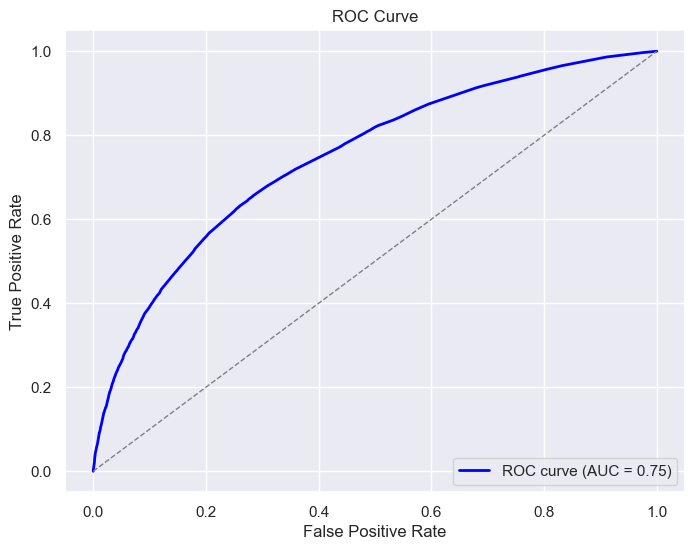

In [26]:
# ROC Curve and AUC
fpr, tpr, thresholds_roc = roc_curve(yTest, yTestProba)
roc_auc = roc_auc_score(yTest, yTestProba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

**Analysis**<br>
AUC = 0.75 indicates that our classifier model achieves a relatively high true positive rate while keeping the false positive rate reasonably low. The classifier is effective in correctly identifying positive instances. 

**Prediction-Recall (PR) Curve and AUC**<br>

The PR curve illustrates the trade-off between precision and recall for a classifier across different threshold values. 

The AUC quantifies the overall performance of the classifier. It ranges from 0 to 1, where a higher AUC value indicates better classifier performance, with a value of 1 representing a perfect classifier with a TPR of 1 and FPR of 0. 

Precision measures the proportion of true positive predictions out of all positive predictions made by the classifier. It quantifies the accuracy of positive predictions.

Recall  measures the proportion of true positive predictions out of all actual positive instances in the dataset. It quantifies the classifier's ability to identify all positive instances.

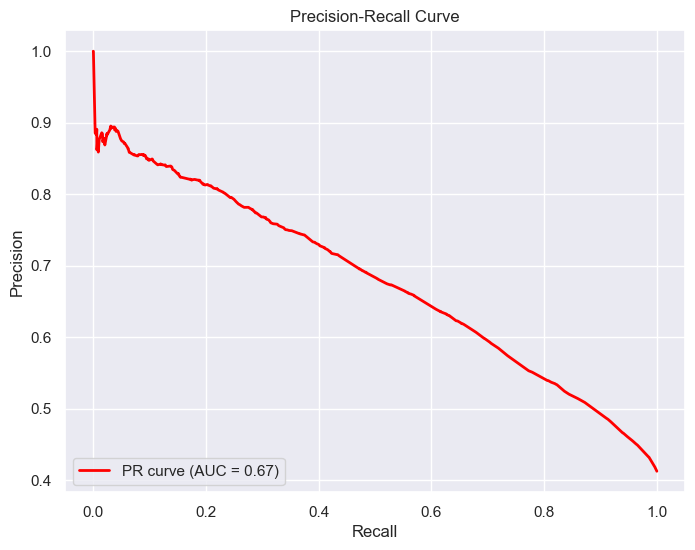

In [27]:
# Precision-Recall Curve and AUC
precision, recall, thresholds_pr = precision_recall_curve(yTest, yTestProba)
pr_auc = average_precision_score(yTest, yTestProba)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='red', lw=2, label='PR curve (AUC = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.grid(True)
plt.show()

**Analysis**<br>

AUC = 0.67 indicates that our classifier model achieves a moderate level of performance in distinguishing between positive and negative instances. It indicates that the classifier strikes a balance between precision and recall, achieving reasonable precision while maintaining a moderate level of recall.

**Confusion Matrix**<br>

A confusion matrix summarises the performance of a classification model on a set of test data for which the true labels are known. It provides a detailed breakdown of the predictions made by the classifier compared to the actual labels.

TPR and FPR can be derived from the confusion matrix. 
TPR is calculated as the true positives over the total actual positives.
FPR is calculated as the false positives over the total actual negatives.


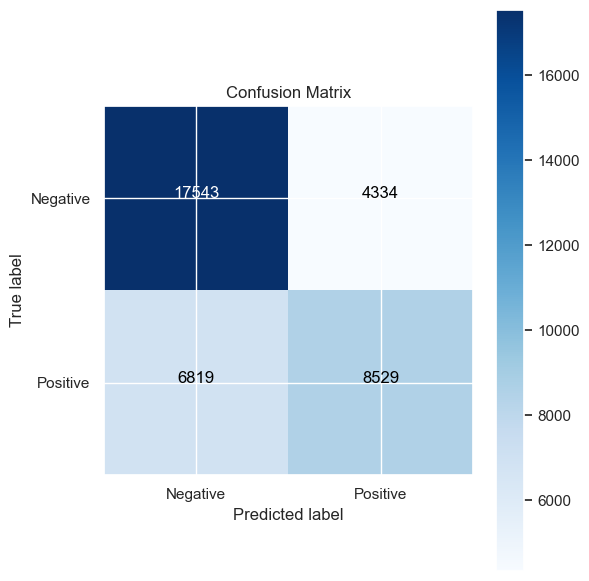

In [28]:
# Confusion Matrix
conf_matrix = confusion_matrix(yTest, yTestPred)
plt.figure(figsize=(6, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.yticks([0, 1], ['Negative', 'Positive'])
plt.tight_layout()
for i in range(2):
    for j in range(2):
        plt.text(j, i, format(conf_matrix[i, j], 'd'), horizontalalignment="center", color="white" if conf_matrix[i, j] > conf_matrix.max() / 2 else "black")
plt.show()

In [29]:
# Check the Goodness of Fit
tnTest, fpTest, fnTest, tpTest = confusion_matrix(yTest, yTestPred).ravel()

tprTest = tpTest / (fnTest + tpTest)
fprTest = fpTest / (fpTest + tnTest)
print("Goodness of Fit of Model \t:Test Dataset")
print("True positive rate \t=", tprTest)
print("False positive rate \t=", fprTest)

Goodness of Fit of Model 	:Test Dataset
True positive rate 	= 0.5557075840500391
False positive rate 	= 0.1981076015907117


**Analysis**<br>

TPR = 0.5557075840500391 indicates that approximately 55.57% of the actual positive instances were correctly identified as positive by the classifier.

FPR = 0.1981076015907117 indicates that approximately 19.81% of the actual negative instances were incorrectly classified as positive by the classifier.

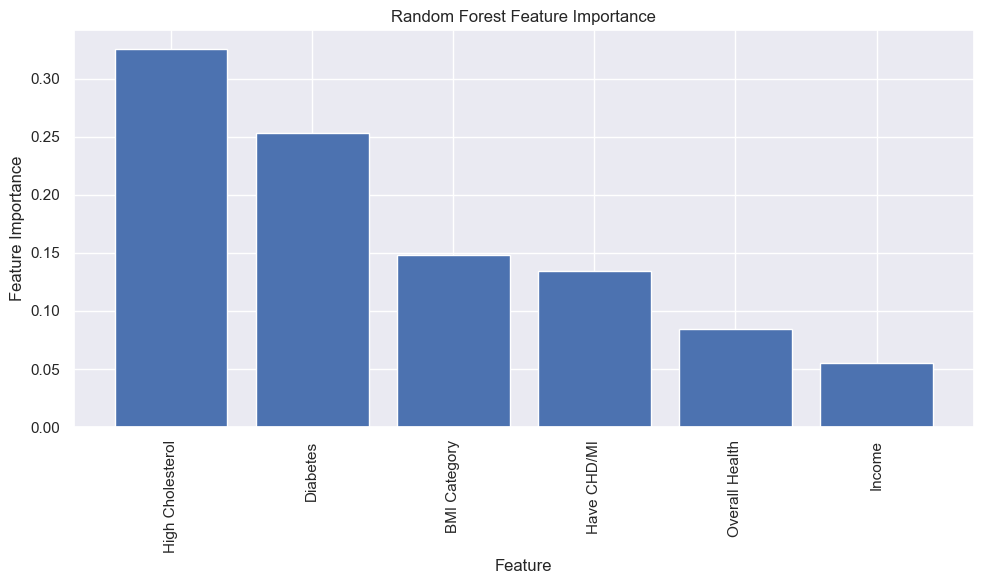

In [30]:
# Get feature importances
feature_importances = RF.feature_importances_

# Sort feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_feature_importances = feature_importances[sorted_indices]

# Get the names of the features
feature_names = xVar.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), sorted_feature_importances, align='center')
plt.xticks(range(len(feature_importances)), feature_names[sorted_indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.tight_layout()
plt.show()


**Analysis**<br>

From the plot above, `High Cholesterol` is the most influential, and `Income` is the least influential in predicting `Hypertension` using random forest classifier. 

### Prediction Accuracy Findings
From the Random Forest Model

`True Positive Rate`: The true positive rate is approximately 0.5478. This means that the model correctly identified around `54.78%` of the positive cases.

`False Positive Rate`: The false positive rate is approximately 0.1977. This indicates that the model incorrectly classified around `19.77%` of the negative cases in the test dataset as positive.

`Accuracy`: The accuracy of the model on the test dataset is approximately 0.7004 or 70.04%. This means that the model correctly predicted the outcome `70.04%` of the cases in the test dataset.

Based on these results, it can be concluded that the overall accuracy of the model is good, indicating that it is able to predict the outcome correctly for a significant portion of the test dataset.